# Avocado Price and Region of sale 

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import plotly.offline as py
import plotly.graph_objs as go
from plotly.offline import init_notebook_mode
init_notebook_mode(connected=True)
from plotly import tools

In [3]:
import warnings
warnings.filterwarnings('ignore')

In [4]:
AV=pd.read_csv('Avocado.csv')

In [5]:
AV.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,27-12-2015,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,20-12-2015,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,13-12-2015,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,06-12-2015,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,29-11-2015,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [6]:
AV.shape

(1517, 14)

In [7]:
AV.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1517 entries, 0 to 1516
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    1517 non-null   int64  
 1   Date          1517 non-null   object 
 2   AveragePrice  1517 non-null   float64
 3   Total Volume  1517 non-null   float64
 4   4046          1517 non-null   float64
 5   4225          1517 non-null   float64
 6   4770          1517 non-null   float64
 7   Total Bags    1517 non-null   float64
 8   Small Bags    1517 non-null   float64
 9   Large Bags    1517 non-null   float64
 10  XLarge Bags   1517 non-null   float64
 11  type          1517 non-null   object 
 12  year          1517 non-null   int64  
 13  region        1517 non-null   object 
dtypes: float64(9), int64(2), object(3)
memory usage: 166.0+ KB


In [8]:
AV.describe()

,Unnamed: 0,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year
count,1517.000000,1517.000000,1.517000e+03,1.517000e+03,1.517000e+03,1.517000e+03,1.517000e+03,1.517000e+03,1.517000e+03,1517.000000,1517.000000
mean,26.995386,1.074990,1.601879e+06,6.464387e+05,6.114375e+05,5.040550e+04,2.935974e+05,2.487736e+05,4.264205e+04,2181.771074,2015.162821
std,14.848287,0.188891,4.433143e+06,1.947614e+06,1.672906e+06,1.377812e+05,7.579765e+05,6.474765e+05,1.182157e+05,7455.712144,0.369324
min,0.000000,0.490000,3.875074e+04,4.677200e+02,1.783770e+03,0.000000e+00,3.311770e+03,3.311770e+03,0.000000e+00,0.000000,2015.000000
25%,14.000000,0.980000,1.474700e+05,2.040034e+04,4.147606e+04,9.112500e+02,3.620689e+04,2.972722e+04,5.407400e+02,0.000000,2015.000000
50%,29.000000,1.080000,4.027919e+05,8.175117e+04,1.186649e+05,7.688170e+03,7.397906e+04,6.237569e+04,5.044350e+03,0.000000,2015.000000
75%,39.000000,1.190000,9.819751e+05,3.775785e+05,4.851503e+05,2.916730e+04,1.576097e+05,1.461994e+05,2.926767e+04,401.480000,2015.000000
max,51.000000,1.680000,4.465546e+07,1.893304e+07,1.895648e+07,1.381516e+06,6.736304e+06,5.893642e+06,1.121076e+06,108072.790000,2016.000000


In [9]:
AV.isnull().sum()

Unnamed: 0      0
Date            0
AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
dtype: int64

In [10]:
AV.drop('Unnamed: 0',axis=1,inplace=True)
AV.head()

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,27-12-2015,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,20-12-2015,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,13-12-2015,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,06-12-2015,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,29-11-2015,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [11]:
AV['Date']=pd.to_datetime(AV['Date'])
AV['Month']=AV['Date'].apply(lambda x:x.month)
AV['Day']=AV['Date'].apply(lambda x:x.day)

In [12]:
AV.head()

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,Month,Day
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany,12,27
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany,12,20
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany,12,13
3,2015-06-12,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany,6,12
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany,11,29


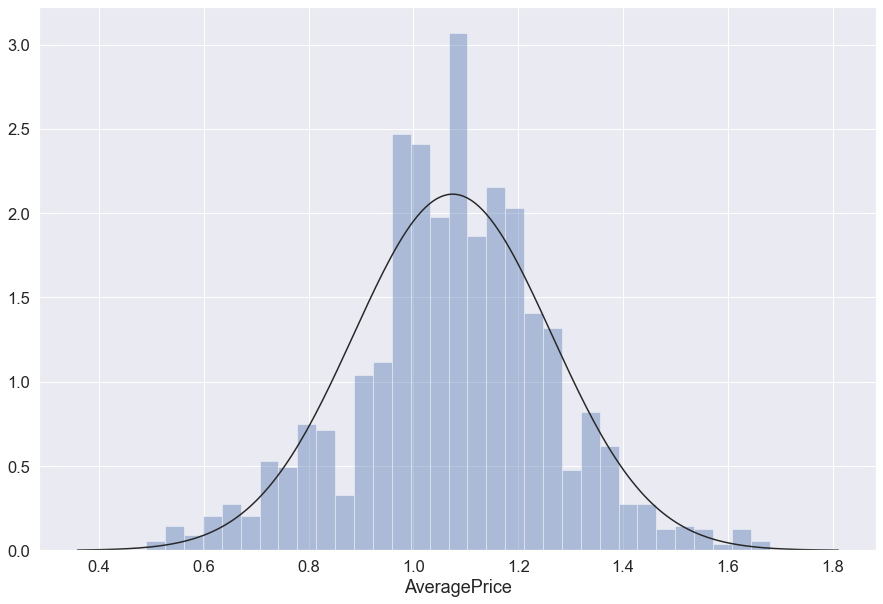

In [13]:
sns.set(font_scale=1.5)
from scipy.stats import norm
fig, ax = plt.subplots(figsize=(15,10))
sns.distplot(a=AV.AveragePrice, kde=False, fit=norm)

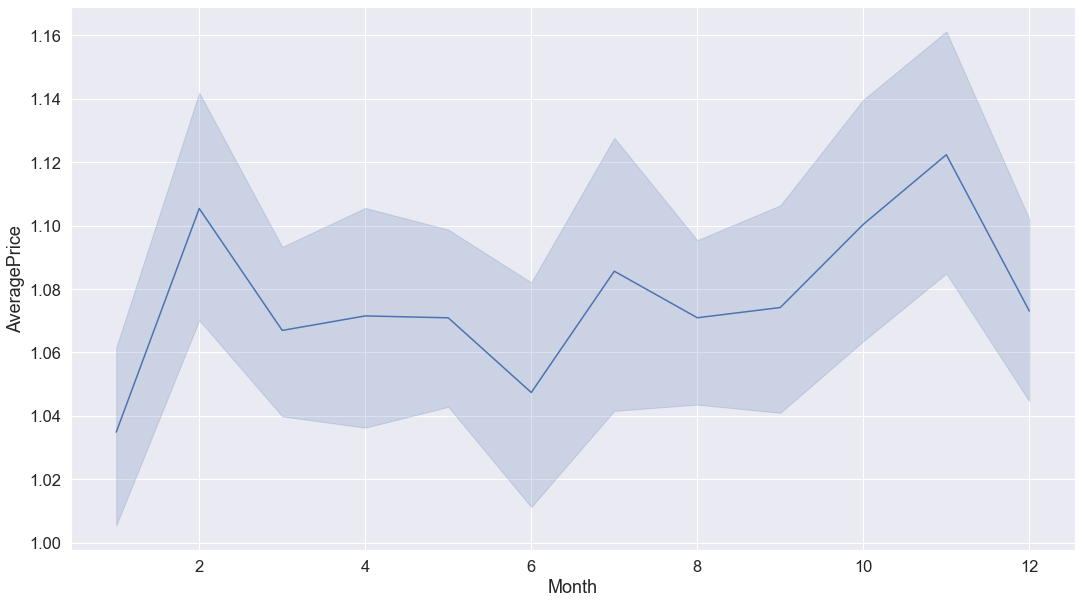

In [14]:
plt.figure(figsize=(18,10))
sns.lineplot(x='Month',y='AveragePrice', data=AV)
plt.show()

Text(0.5, 1.0, 'Average Price of Avocado According to Region')

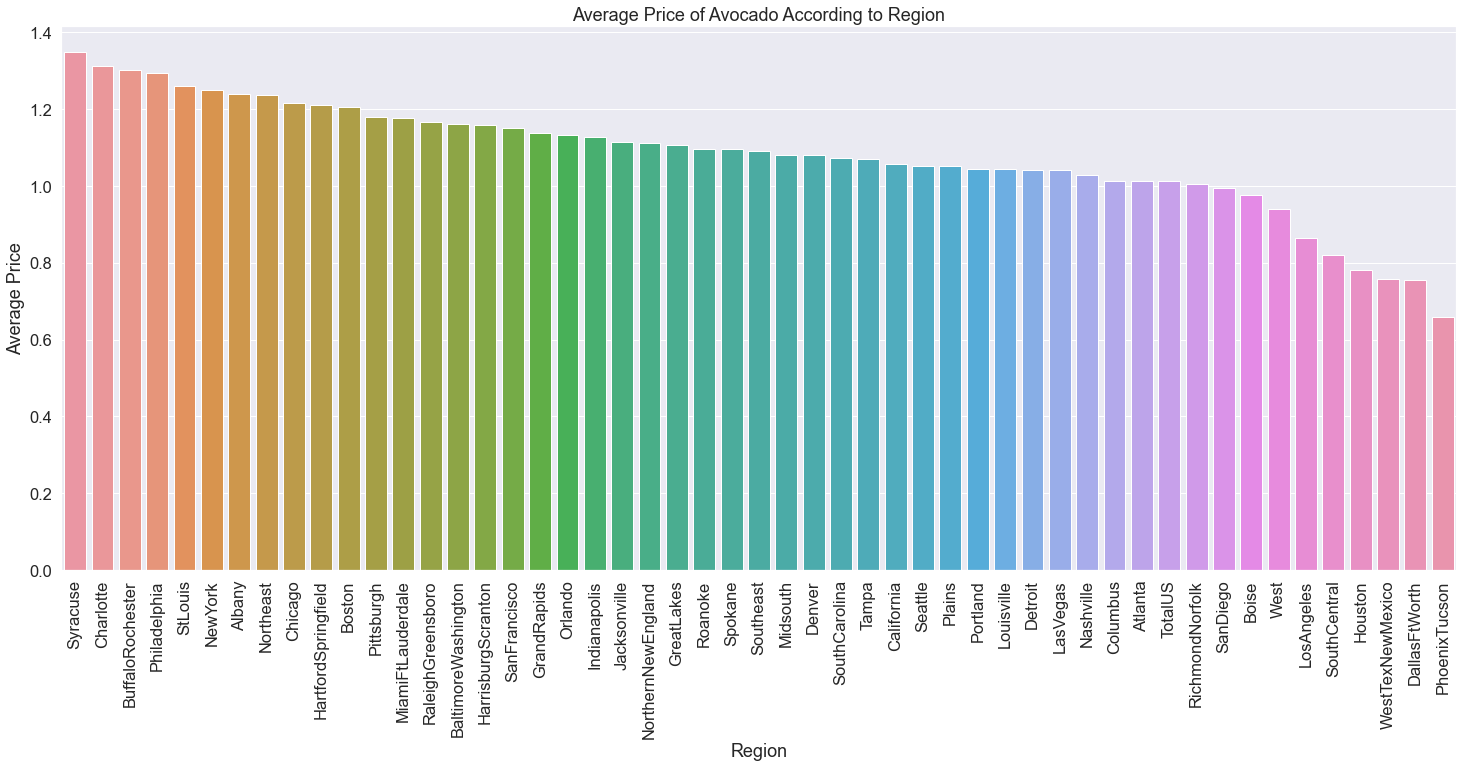

In [15]:
region_list=list(AV.region.unique())
average_price=[]

for i in region_list:
    x=AV[AV.region==i]
    region_average=sum(x.AveragePrice/len(x))
    average_price.append(region_average)
    
AV1=pd.DataFrame({'region_list':region_list,'average_price':average_price})
new_index=AV1.average_price.sort_values(ascending=False).index.values
sorted_data=AV1.reindex(new_index)

plt.figure(figsize=(25,10))
av=sns.barplot(x=sorted_data.region_list,y=sorted_data.average_price)

plt.xticks(rotation=90)
plt.xlabel('Region')
plt.ylabel('Average Price')
plt.title('Average Price of Avocado According to Region')

Text(0.5, 1.0, 'Average of Total Volume According to Region')

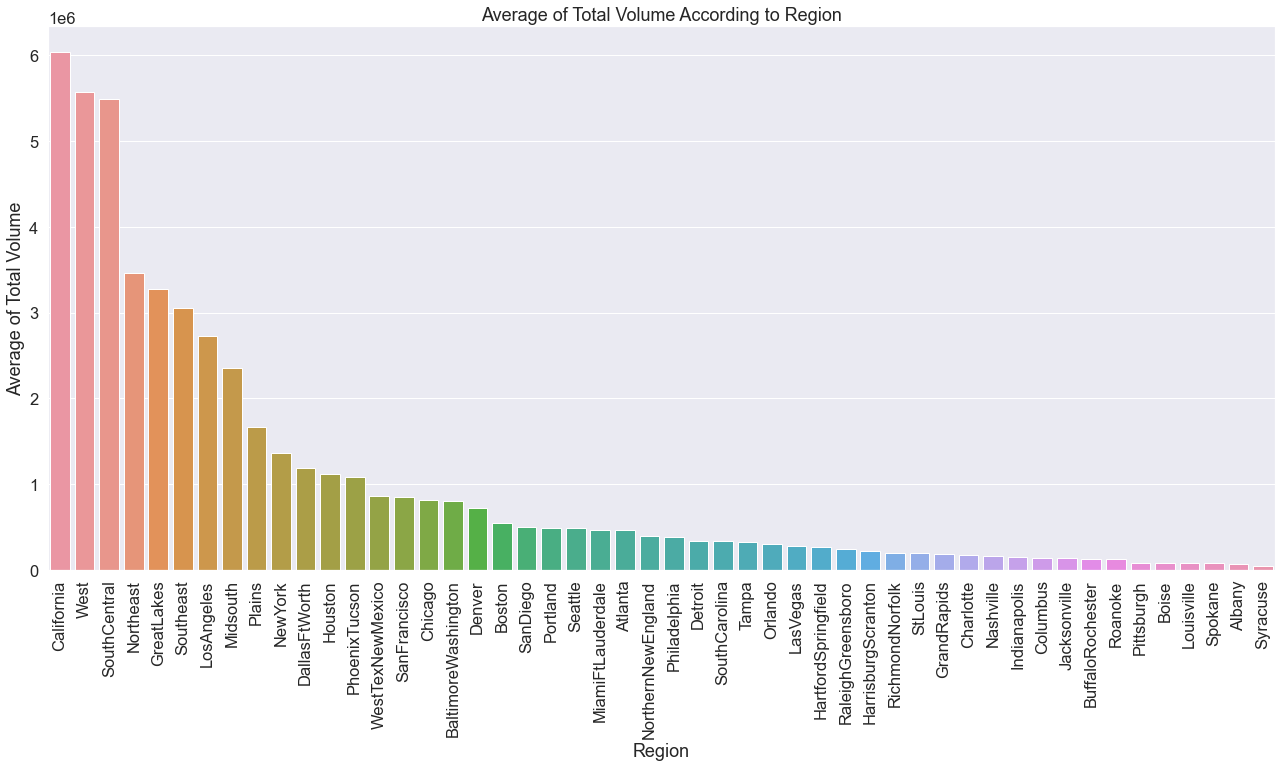

In [16]:
filter1=AV.region!='TotalUS'
AV1=AV[filter1]

region_list=list(AV1.region.unique())
average_total_volume=[]

for i in region_list:
    x=AV1[AV1.region==i]
    average_total_volume.append(sum(x['Total Volume'])/len(x))
AV3=pd.DataFrame({'region_list':region_list,'average_total_volume':average_total_volume})

new_index=AV3.average_total_volume.sort_values(ascending=False).index.values
sorted_data1=AV3.reindex(new_index)

plt.figure(figsize=(22,10))
ax=sns.barplot(x=sorted_data1.region_list,y=sorted_data1.average_total_volume)

plt.xticks(rotation=90)
plt.xlabel('Region')
plt.ylabel('Average of Total Volume')
plt.title('Average of Total Volume According to Region')

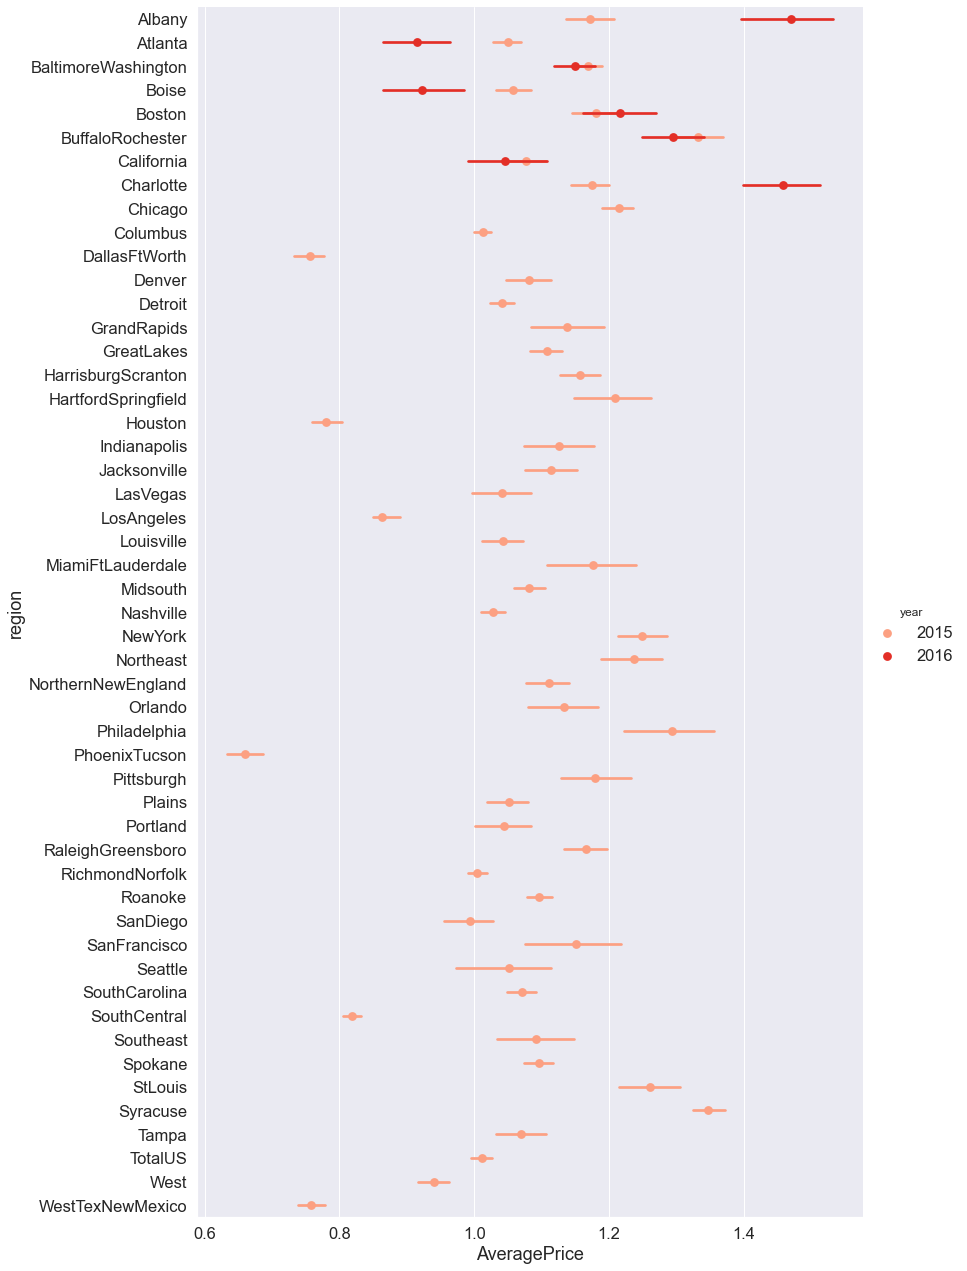

In [17]:
a= sns.factorplot('AveragePrice','region',data=AV,
                   hue='year',
                   size=18,
                   aspect=0.7,
                   palette='Reds',
                   join=False)

Text(0.5, 1.0, 'Average Price')

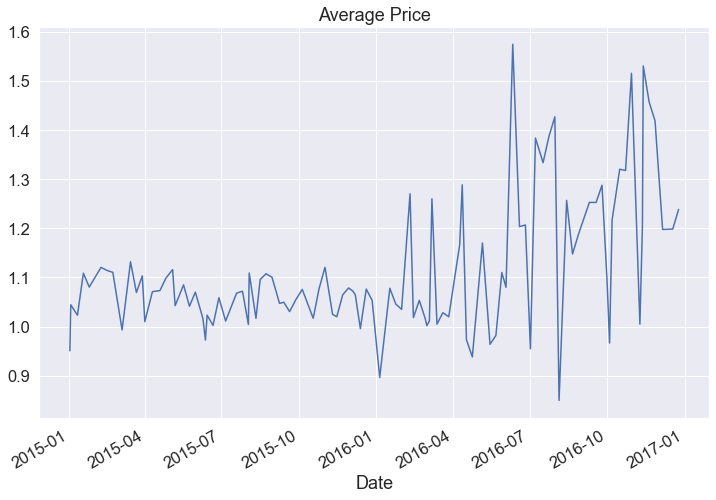

In [18]:
byDate=AV.groupby('Date').mean()
plt.figure(figsize=(12,8))
byDate['AveragePrice'].plot()
plt.title('Average Price')

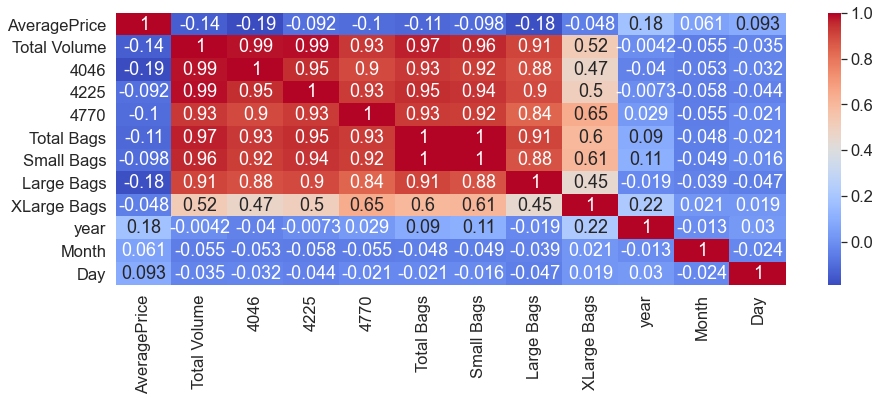

In [19]:
plt.figure(figsize=(15,5))
sns.heatmap(AV.corr(),cmap='coolwarm',annot=True)

In [20]:
AV['type'].unique()

array(['conventional'], dtype=object)

In [21]:
AV['region'].nunique()

51

In [22]:
AV.head()

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,Month,Day
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany,12,27
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany,12,20
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany,12,13
3,2015-06-12,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany,6,12
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany,11,29


In [23]:
AV_data=pd.get_dummies(AV.drop(['region','Date'],axis=1),drop_first=True)

In [24]:
AV_data.head()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year,Month,Day
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,2015,12,27
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,2015,12,20
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,2015,12,13
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,2015,6,12
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,2015,11,29


This is a Regression task

In [33]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import ElasticNet,Ridge,Lasso
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error,mean_absolute_error


In [28]:
AV_data.shape

(1517, 12)

In [30]:
x=AV_data.iloc[:,1:13]
x.head()

,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year,Month,Day
0,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,2015,12,27
1,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,2015,12,20
2,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,2015,12,13
3,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,2015,6,12
4,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,2015,11,29


In [31]:
y=AV_data.iloc[:,0:1]
y.head()

,AveragePrice
0,1.33
1,1.35
2,0.93
3,1.08
4,1.28


In [34]:
sc=StandardScaler()
x=sc.fit_transform(x)


In [35]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=45,shuffle=True)


In [36]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(1213, 11)
(1213, 1)
(304, 11)
(304, 1)


In [40]:
model=[LinearRegression(), DecisionTreeRegressor(), RandomForestRegressor(), Lasso(), Ridge(), ElasticNet()]
for m in model:
    m.fit(x_train,y_train)
    print('Score of',m,'is:',m.score(x_train,y_train))
    predm=m.predict(x_test)
    print('Error')
    print('Mean absolute error:',mean_absolute_error(y_test,predm))
    print('Mean squared error:',mean_squared_error(y_test,predm))
    print('Root Mean Squared Error:',np.sqrt(mean_squared_error(y_test,predm)))
    print('r2_score:',r2_score(y_test,predm))
    print('*******************************************************************')
    print('\n')
    
   

Score of LinearRegression() is: 0.19159846979371953
Error
Mean absolute error: 0.13848629448751149
Mean squared error: 0.031087401531956372
Root Mean Squared Error: 0.17631619758818637
r2_score: 0.1401692993421172
*******************************************************************


Score of DecisionTreeRegressor() is: 1.0
Error
Mean absolute error: 0.08105263157894738
Mean squared error: 0.014919736842105265
Root Mean Squared Error: 0.12214637465805224
r2_score: 0.5873425519533512
*******************************************************************


Score of RandomForestRegressor() is: 0.9732820209425335
Error
Mean absolute error: 0.06541348684210523
Mean squared error: 0.007931554440789468
Root Mean Squared Error: 0.0890592748723538
r2_score: 0.780625151152639
*******************************************************************


Score of Lasso() is: 0.0
Error
Mean absolute error: 0.1473269297522454
Mean squared error: 0.03616547616852419
Root Mean Squared Error: 0.19017222764779348
r

RandomForestRegressor is the best model to determine average price of the Avocado

In [43]:
AV.head()

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,Month,Day
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany,12,27
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany,12,20
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany,12,13
3,2015-06-12,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany,6,12
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany,11,29


In [44]:
from sklearn import preprocessing
LE=preprocessing.LabelEncoder()
AV['region']=LE.fit_transform(AV['region'])
AV.head()


,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,Month,Day
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,0,12,27
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,0,12,20
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,0,12,13
3,2015-06-12,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,0,6,12
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,0,11,29


In [45]:
AV['region'].unique()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50])

In [73]:
AV_data1=pd.get_dummies(AV.drop(['Date','Total Bags'],axis=1),drop_first=True)

In [74]:
AV_data1.head()

,AveragePrice,Total Volume,4046,4225,4770,Small Bags,Large Bags,XLarge Bags,year,region,Month,Day
0,1.33,64236.62,1036.74,54454.85,48.16,8603.62,93.25,0.0,2015,0,12,27
1,1.35,54876.98,674.28,44638.81,58.33,9408.07,97.49,0.0,2015,0,12,20
2,0.93,118220.22,794.70,109149.67,130.50,8042.21,103.14,0.0,2015,0,12,13
3,1.08,78992.15,1132.00,71976.41,72.58,5677.40,133.76,0.0,2015,0,6,12
4,1.28,51039.60,941.48,43838.39,75.78,5986.26,197.69,0.0,2015,0,11,29


In [86]:
AV_data1.shape

(1517, 12)

In [87]:
AV_data1.columns

Index(['AveragePrice', 'Total Volume', '4046', '4225', '4770', 'Small Bags',
       'Large Bags', 'XLarge Bags', 'year', 'region', 'Month', 'Day'],
      dtype='object')

In [88]:
x=AV_data1.drop(columns=['region'],axis=1)
x.head()

,AveragePrice,Total Volume,4046,4225,4770,Small Bags,Large Bags,XLarge Bags,year,Month,Day
0,1.33,64236.62,1036.74,54454.85,48.16,8603.62,93.25,0.0,2015,12,27
1,1.35,54876.98,674.28,44638.81,58.33,9408.07,97.49,0.0,2015,12,20
2,0.93,118220.22,794.70,109149.67,130.50,8042.21,103.14,0.0,2015,12,13
3,1.08,78992.15,1132.00,71976.41,72.58,5677.40,133.76,0.0,2015,6,12
4,1.28,51039.60,941.48,43838.39,75.78,5986.26,197.69,0.0,2015,11,29


In [89]:
y=AV_data1.iloc[:,9:10]
y.head()

,region
0,0
1,0
2,0
3,0
4,0


In [90]:
sc=StandardScaler()
x=sc.fit_transform(x)


In [91]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=47,shuffle=True)


In [92]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(1213, 11)
(1213, 1)
(304, 11)
(304, 1)


In [93]:
model=[LinearRegression(), DecisionTreeRegressor(), RandomForestRegressor(), Lasso(), Ridge(), ElasticNet()]
for m in model:
    m.fit(x_train,y_train)
    print('Score of',m,'is:',m.score(x_train,y_train))
    predm=m.predict(x_test)
    print('Error')
    print('Mean absolute error:',mean_absolute_error(y_test,predm))
    print('Mean squared error:',mean_squared_error(y_test,predm))
    print('Root Mean Squared Error:',np.sqrt(mean_squared_error(y_test,predm)))
    print('r2_score:',r2_score(y_test,predm))
    print('*******************************************************************')
    print('\n')
    

Score of LinearRegression() is: 0.3570109361164041
Error
Mean absolute error: 10.683167240738868
Mean squared error: 178.7174562883221
Root Mean Squared Error: 13.368524835909238
r2_score: 0.3245433509778137
*******************************************************************


Score of DecisionTreeRegressor() is: 1.0
Error
Mean absolute error: 2.3157894736842106
Mean squared error: 67.76315789473684
Root Mean Squared Error: 8.231838062956342
r2_score: 0.74389141100521
*******************************************************************


Score of RandomForestRegressor() is: 0.9863423514211549
Error
Mean absolute error: 2.459440789473684
Mean squared error: 20.963266118421053
Root Mean Squared Error: 4.578565945623264
r2_score: 0.9207700368000691
*******************************************************************


Score of Lasso() is: 0.30771354191402245
Error
Mean absolute error: 10.914688781670222
Mean squared error: 180.68552916315787
Root Mean Squared Error: 13.441931749683818
r2_sc

RandomForestRegressor is the best model to determine the region of sales